# Angetriebener harmonischer Oszillator


## Created: RW, 18.1.20
## Revision: 28.2.20,23.2.20,17.2.20, 8.2.20,30.1.20,19.1.20
## Status: works

## Laden von notwendigen python Modulen

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import root
import scipy.constants as co

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 11,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

#%matplotlib inline - Figures are shown as static png images (optionally svg if configured)
%matplotlib notebook 
#or %matplotlib nbagg - Interactive Figures inside the notebook
# %matplotlib widgets - - Interactive Figures inside the notebook (requires jupyter-matplotlib to be installed)
#%matplotlib tk or 
#%matplotlib qt 
# etc. - GUI windows show the figure externally to the notebook with the given interactive backend

import matplotlib.pyplot as plt
import matplotlib.cm as cm


## Methode der Laplace Transformation $F(s)=\mathcal{L}[f(t)]$

Man kann auch analytisch mit dem packet sympy rechen
 siehe https://docs.sympy.org/latest/tutorial/index.html tolles interaktive Webseite

In [2]:
from sympy.integrals.transforms import inverse_laplace_transform, laplace_transform

from sympy import exp, Symbol
from sympy.abc import s, t, a, b

In [3]:
# b = Symbol('b', positive=True)
laplace_transform(t**a, t,s)

(s**(-a)*gamma(a + 1)/s, 0, re(a) > -1)

In [4]:
a = Symbol('a', positive=True)
inverse_laplace_transform(exp(-a*s)/s, s, t)

Heaviside(-a + t)

Defintion einer komplexen Variablen $s=x+i y$ auf einem 2-dimensionalen Koordinatengitter. Mit dem Befehl meshgrid kann man aus einem linearen Zahlen Tupel $x$ eine zweidimensionale Matrix $X$ erzeugen, 
die ideal geeigent ist um Funktionen simultan für aller Gitterpunkte auf diesem Gitter auszuwerten.

In [5]:
'''step size'''
delta = 0.01
x = np.arange(-2.0001, 2., delta)
y = np.arange(-2.0001, 2., delta)

X, Y = np.meshgrid(x, y)
S = X+1j*Y

### Höhenliniendarstellungen analytischer einfacher Funktionen: $F(s=x+iy)=s$

<IPython.core.display.Javascript object>


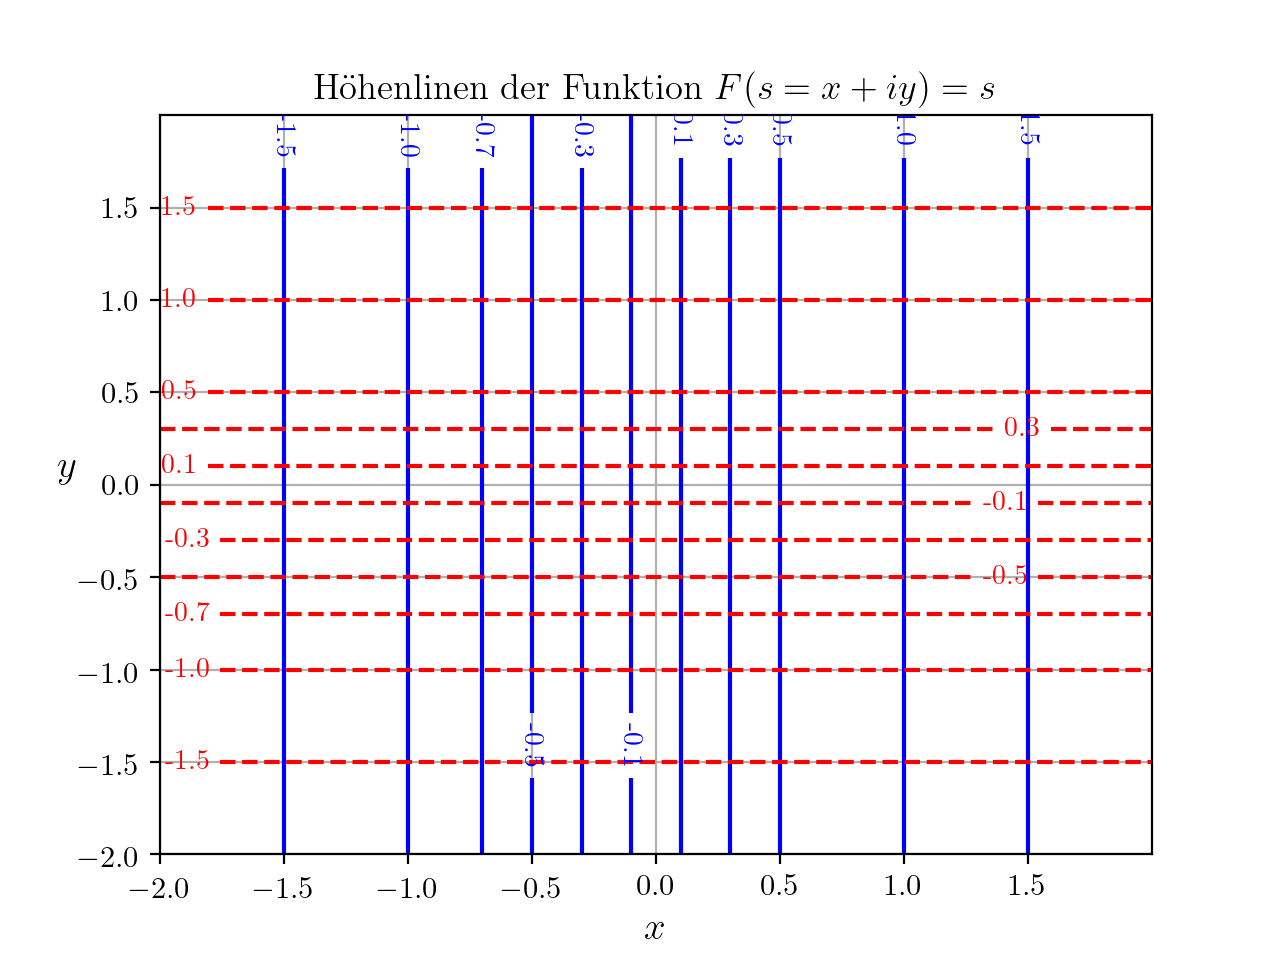

Text(0, 0.5, '$y$')

In [6]:
fig, ax = plt.subplots()
contourvalues= [-1.5,-1,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,1,1.5]

Z=S
CS = ax.contour(X, Y, np.real(Z), levels=contourvalues,colors='blue',linestyles=['solid'])
ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')

CS = ax.contour(X, Y, np.imag(Z), levels=contourvalues,colors='red',linestyles=['dashed'])
ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')

ax.grid()
ax.set_title('Höhenlinen der Funktion $F(s=x+iy)=s$')
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$y$', fontsize=14,rotation='horizontal')

#labels = ['line1', 'line2','line3','line4',
#           'line5', 'line6']
#for i in range(len(labels)):
#    CS.collections[i].set_label(labels[i])
#ax.legend(loc='upper right')

### Höhenliniendarstellungen einfacher Funktionen: $F(s=x+iy)=\frac{1}{s-1-i}$

<IPython.core.display.Javascript object>


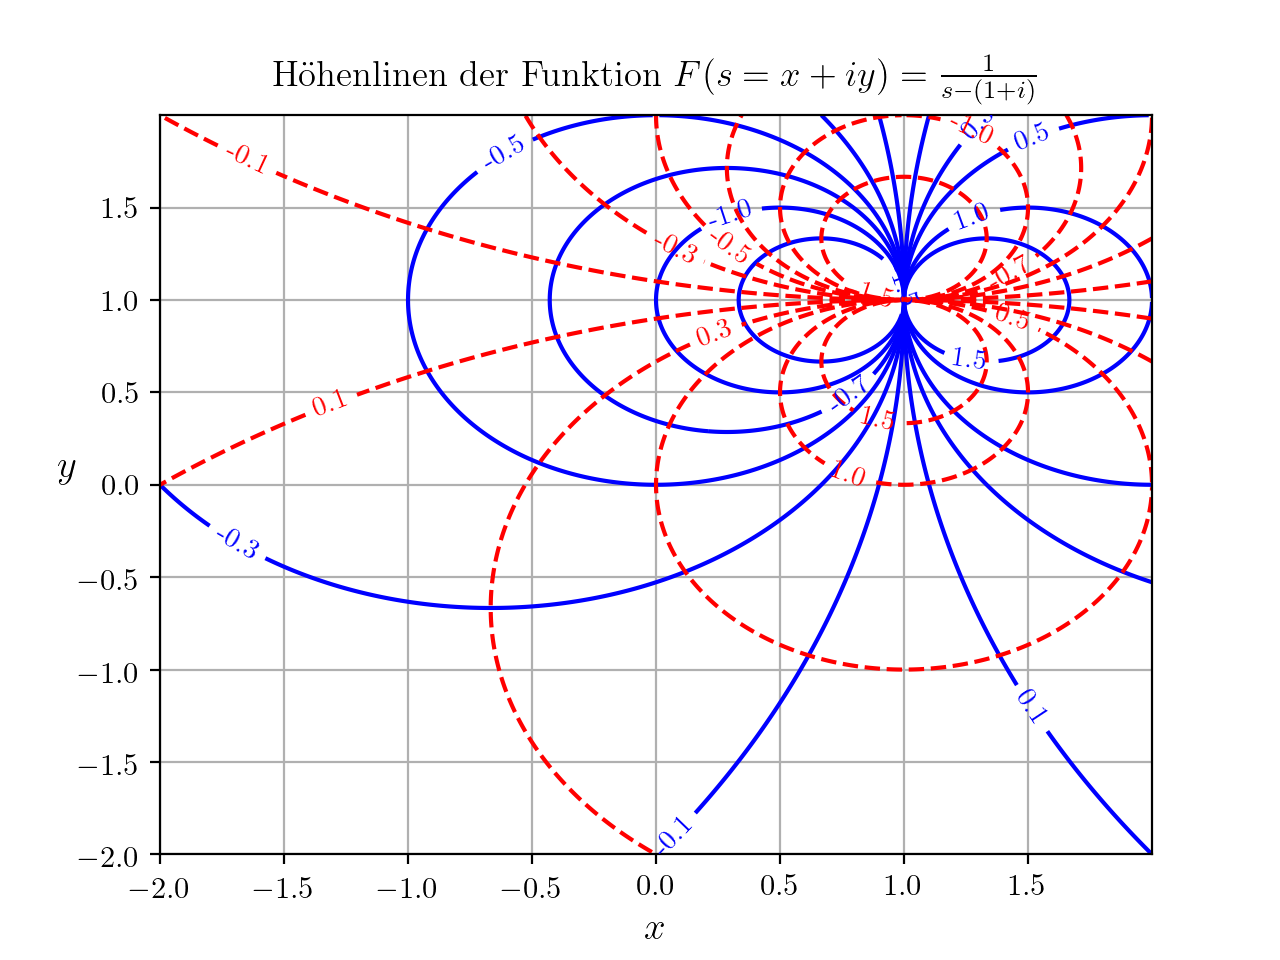

Text(0, 0.5, '$y$')

In [7]:
fig, ax = plt.subplots()
contourvalues= [-1.5,-1,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,1,1.5]
    
Z=(S-1-1j)**(-1)

CS = ax.contour(X, Y, np.real(Z), levels=contourvalues,colors='blue',linestyles=['solid'])
ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')

CS = ax.contour(X, Y, np.imag(Z), levels=contourvalues,colors='red',linestyles=['dashed'])
ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')

ax.grid()
ax.set_title(r'Höhenlinen der Funktion $F(s=x+iy)=\frac{1}{s-(1+i)}$')
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14,rotation='horizontal')

## Homogene $X_h(s)$ und partikuläre Lösung $X_p(s)$ des angetreieben Oszillators im Frequenzraum

### Schwach gedämpfter freier Oszillator, homogene Lösung 
\begin{equation}
X_h(s=x+iy)=\frac{s x_0+v_0}{s^2+2 \kappa s+\omega_0^2}\end{equation}
mit den Anfangsbedigungen 
* Ort $x_0=0.5$, 
* Geschwindigkeit $v_0=1$

und der 

* freien Oszillatorfrequenz $\omega_0=1$
* Dampfungsrate $\kappa=0.2$

<IPython.core.display.Javascript object>


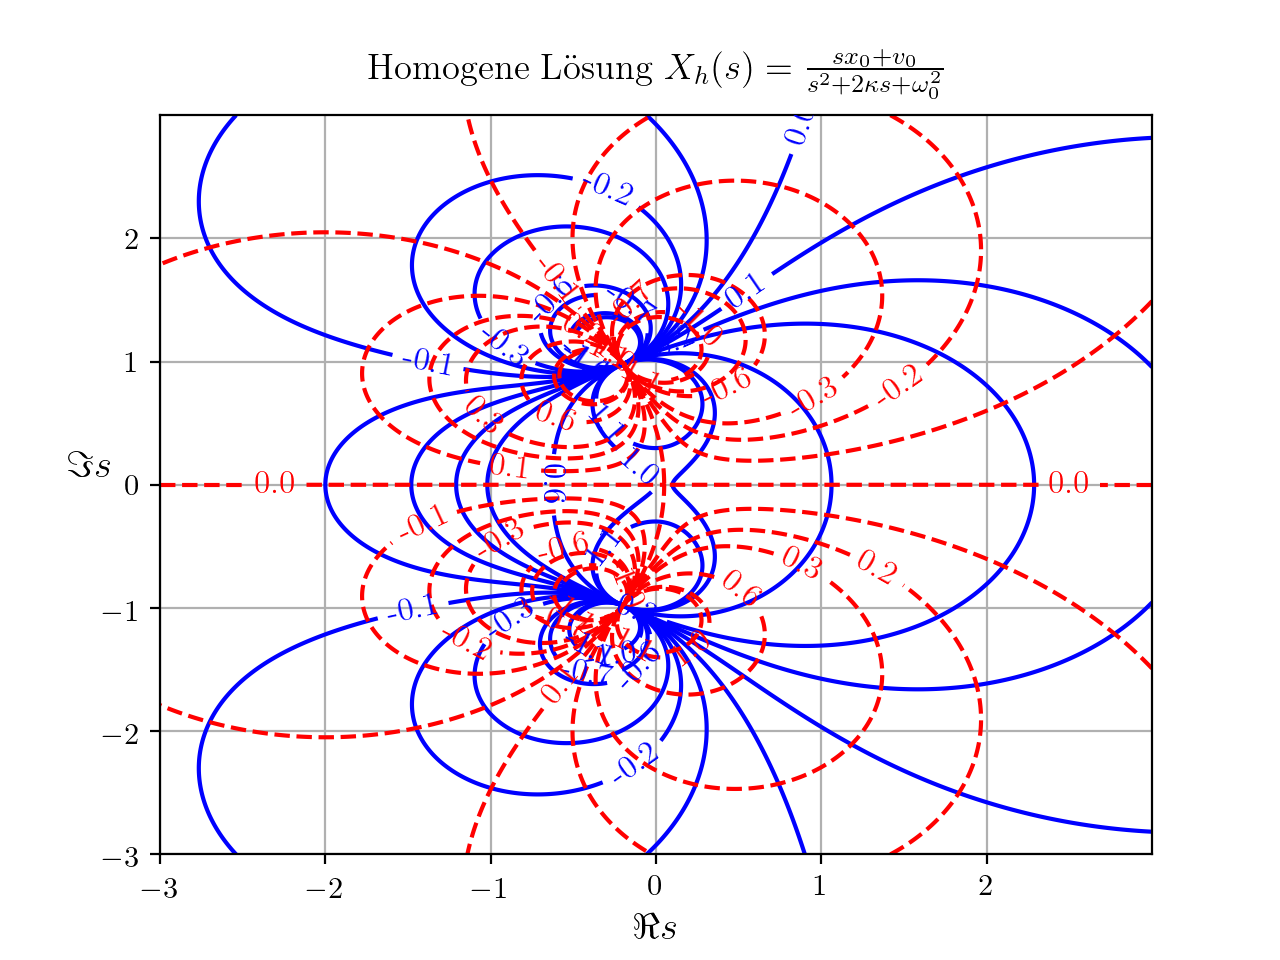

In [8]:
fig, ax = plt.subplots()
contourvalues= [-1.1,-1,-0.7,-0.6,-0.3,-0.2,-0.1,0, 0.1,0.2,0.3,0.6,1,1.1]

delta = 0.01
x = np.arange(-3.0001, 3., delta)
y = np.arange(-3.0001, 3., delta)

X, Y = np.meshgrid(x, y)
S = X+1j*Y

omega0=1.0
kappa=0.2

x0= 0.5
v0= 1

Z=(S*x0+v0)/(S**2+2*kappa*S+omega0**2)

CS = ax.contour(X, Y, np.real(Z), levels=contourvalues,
                colors='blue',linestyles=['solid'])
ax.clabel(CS, inline=1, fontsize=12,fmt='%1.1f')

CS = ax.contour(X, Y, np.imag(Z), levels=contourvalues,
                colors='red',linestyles=['dashed'])
ax.clabel(CS, inline=1, fontsize=12,fmt='%1.1f')

ax.grid()
ax.set_title(r'Homogene Lösung $X_h(s)=\frac{s x_0+v_0}{s^2+2 \kappa s+\omega_0^2}$')
ax.set_xlabel('$\Re{s}$', fontsize=14)
ax.set_ylabel('$\Im{s}$', fontsize=14,rotation='horizontal')

plt.savefig('pictures/laplacetrafo_freie_oszillation.pdf', dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
plt.savefig('pictures/laplacetrafo_freie_oszillation.pgf', dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)


### Höhenliniendarstellungen der partikulären Lösung 
\begin{align}
X_p(s=x+iy)=\frac{f_0s}{(s^2+2 \kappa s+\omega_0^2)(s^2+\Omega^2)}
\end{align}

<IPython.core.display.Javascript object>


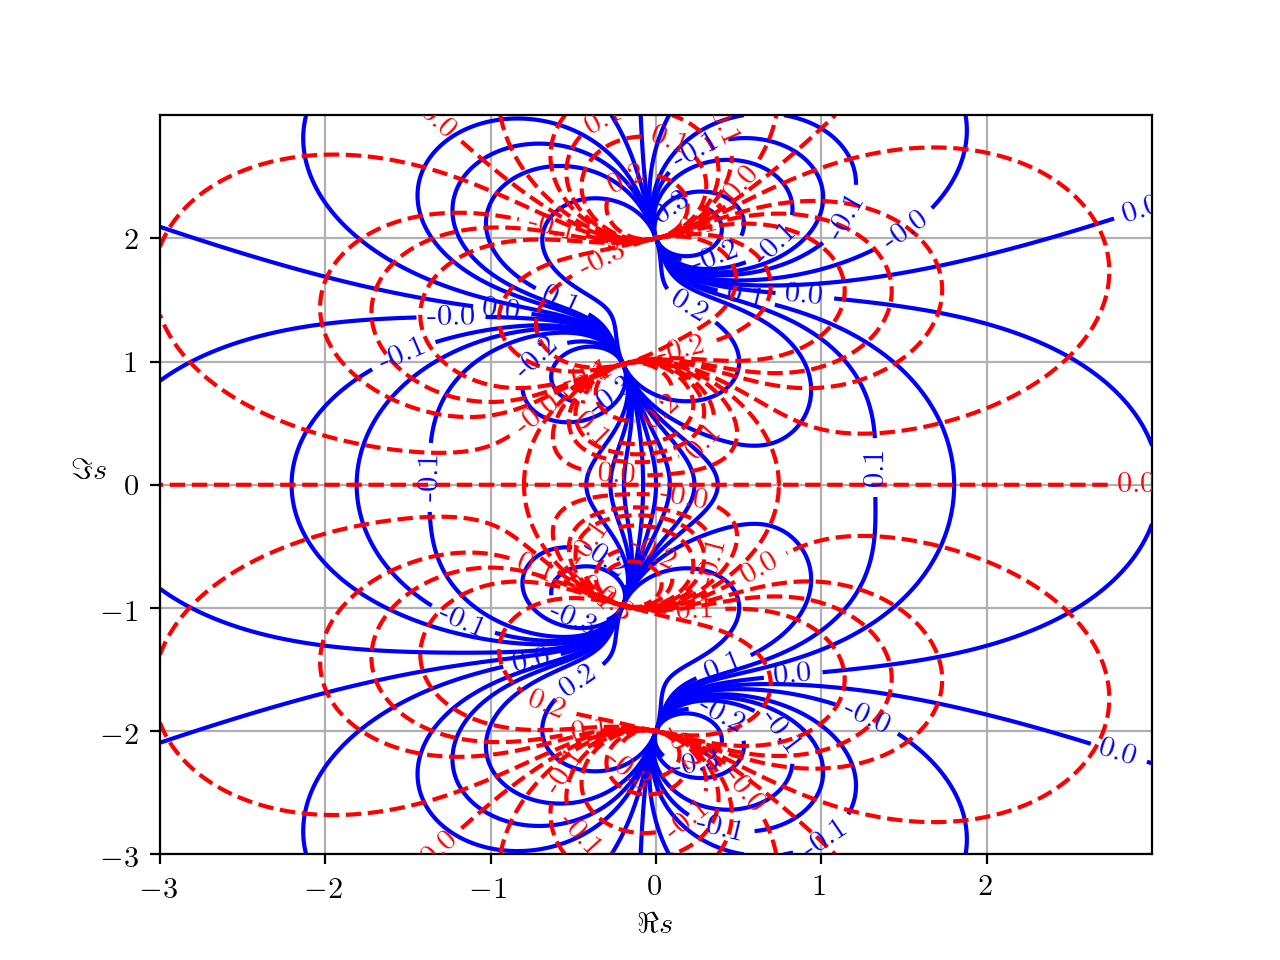

In [9]:
fig, ax = plt.subplots()
contourvalues= [-0.3,-0.2,-0.1,-0.07,-0.05,-0.02,0,0.02,0.05,0.07,0.1,0.2]

omega0=1.0
kappa=0.2

x0= 0.5
v0= 1

'''force parameters'''
Omega=2
f0=1

Z=f0*S/((S**2+Omega**2)*(S**2+2*kappa*S+omega0**2))

CS = ax.contour(X, Y, np.real(Z), levels=contourvalues,colors='blue',linestyles=['solid'])
ax.clabel(CS, inline=1, fmt='%1.1f') # fontsize=12,

CS = ax.contour(X, Y, np.imag(Z), levels=contourvalues,colors='red',linestyles=['dashed'])
ax.clabel(CS, inline=1, fmt='%1.1f') # fontsize=12,

ax.grid()
# ax.set_title(r'Höhenlinen $X(s)=\frac{f_0s}{(s^2+2 \kappa s+\omega_0^2)(s^2+\Omega^2)}$')
ax.set_xlabel('$\Re s$') #, fontsize=14)
ax.set_ylabel('$\Im s$',rotation='horizontal') #, fontsize=14,

plt.savefig('pictures/laplacetrafo_particulary.pdf', dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
plt.savefig('pictures/laplacetrafo_particulary.pgf', dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)


## Resonanzfrequenzspektrum

In [ ]:
omega0=1.0
kappa=0.2
kappavec=np.linspace(0.1,omega0/np.sqrt(2.0),100)
Omresvec=np.sqrt(omega0**2-2.0*kappavec**2)

omega=np.sqrt(omega0**2-kappa**2)
omegavec=np.sqrt(omega0**2-kappavec**2)
Iresvec=1.0/(4.0*kappavec**2*omegavec**2)

lamm=-kappa-1j*omega
lamp=np.conj(lamm)

#x0= 0.5
#v0= 1

'''force parameters'''
f0=1

Omres=np.sqrt(omega0**2-2.0*kappa**2)
Gammares=2.0*kappa*omega/Omres
Ires=1/(4.0*kappa**2*omega**2)

Om=np.linspace(0,3,1000)
Gamma=4.0*kappa*omega/(Omres+Om)

'''T1ansmissions amplitude'''
Tm=1/((lamm+1j*Om)*(lamp+1j*Om))

'''Intensity spectra'''
Im=np.real(Tm*np.conj(Tm))

Im2=(1/(Om+Omres)**2)/((Om-Omres)**2+(Gamma/2.0)**2)

ImLorentz=(1/(2.0*kappa*omega))**2*(
    (Gammares/2.0)**2/((Om-Omres)**2+(Gammares/2.0)**2))

# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

ax.plot(Om,Im,'b-',lw=1,label=r"Exaktes Spektrum $\tilde{\kappa}$=0.2")
ax.plot(Om,ImLorentz,'r-.',lw=1,label=r'Lorentz Spektrum $\tilde\kappa$=0.2')
ax.set_xlabel(r'$\tilde \Omega$',fontsize='large')
ax.set_ylabel(r'$|T|^2$',fontsize='large',rotation='horizontal',labelpad=20)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the axes and 1 to the top.
# ax.vlines([Omres-Gammares/2.0, Omres+Gammares/2.0], 0, 1, transform=ax.get_xaxis_transform(), colors='g',linestyles='dotted')

ax.hlines( [Ires/2],0, 1,transform=ax.get_yaxis_transform(), 
          colors='g',linestyles='dotted',
          label=r'$|T_r(\tilde \kappa=0.2)|^2/2$')
# for the exact FWHM 
OmresplHWHM=np.sqrt(Omres**2+2.0*omega*kappa)
Tmres=1/((lamm+1j*Omres)*(lamp+1j*Omres))
TmresplHWHM=1/((lamm+1j*OmresplHWHM)*(lamp+1j*OmresplHWHM))

OmresmiHWHM=np.sqrt(Omres**2-2.0*omega*kappa)
#Tmres=1/((lamm+1j*Omres)*(lamp+1j*Omres))
TmresmiHWHM=1/((lamm+1j*OmresmiHWHM)*(lamp+1j*OmresmiHWHM))

GammaFWHM=OmresplHWHM-OmresmiHWHM

# for the Gamma_r approximation of the linewidth
#ax.axvspan(Omres-Gammares/2.0, Omres+Gammares/2.0, facecolor='#2ca02c', alpha=0.1)
ax.axvspan(OmresmiHWHM, OmresplHWHM, facecolor='#2ca02c', alpha=0.1)
print("Gammares=",Gammares)
print("GammaFWHM=",GammaFWHM)
print("Omres=",Omres)


'''again with a larger width'''
omega0=1.0
kappa=0.4
omega=np.sqrt(omega0**2-kappa**2)

lamm=-kappa-1j*omega
lamp=np.conj(lamm)

x0= 0.5
v0= 1

'''force parameters'''
f0=1

Omres=np.sqrt(omega0**2-2.0*kappa**2)
Gammares=2.0*kappa*omega/Omres
Ires=1/(4.0*kappa**2*omega**2)

Om=np.linspace(0,3,1000)
Gamma=4.0*kappa*omega/(Omres+Om)

'''TRansmissions amplitude'''
Tm=1.0/((lamm+1j*Om)*(lamp+1j*Om))

'''Intensity spectra'''
Im=np.real(Tm*np.conj(Tm))

Im2=(1/(Om+Omres)**2)/((Om-Omres)**2+(Gamma/2.0)**2)

ImLorentz=(1/(2.0*kappa*omega))**2*(
    (Gammares/2.0)**2/((Om-Omres)**2+(Gammares/2.0)**2))


ax.plot(Om,Im,'b--',lw=1,label=r'Exaktes Spektrum $\tilde\kappa$=0.4')
ax.plot(Omresvec,Iresvec,'k',linestyle='dotted',lw=1,label=r'$|T_r(\tilde\kappa)|^2$')
ax.annotate(r'$\tilde{\Gamma}(\Omega_r)$', xy=(0.78, 0.7), xycoords='data',fontsize='large')
ax.set_ylim(ymin=-0.2,ymax=7)
ax.grid()
ax.legend(loc='upper right')
fig.tight_layout()

plt.savefig('pictures/resonance_spectrum.pdf', dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
plt.savefig('pictures/resonance_spectrum.pgf', dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)



In [ ]:
Ires

In [ ]:
np.abs(Tmres)**2/2-np.abs(TmresplHWHM)**2

In [ ]:
np.abs(Tmres)**2/2-np.abs(TmresmiHWHM)**2

In [ ]:
Gammares

In [ ]:
GammaFWHM

## Phasenverschiebung

In [ ]:
omega0=1.0
Om=np.linspace(0,3,1000)


kappa=0.001
omega=np.sqrt(omega0**2-kappa**2)

'''Phase'''
phi=np.arctan2(2.0*kappa*Om,omega0**2-Om**2)

# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

ax.plot(Om,phi,'k-',lw=1,label=r"$\kappa=0.001$")

kappa=0.1
omega=np.sqrt(omega0**2-kappa**2)

'''Phase'''
phi=np.arctan2(2.0*kappa*Om,omega0**2-Om**2)
ax.plot(Om,phi,'b-.',lw=1,label=r"$\kappa=0.1$")

kappa=0.2
omega=np.sqrt(omega0**2-kappa**2)

'''Phase'''
phi=np.arctan2(2.0*kappa*Om,omega0**2-Om**2)
ax.plot(Om,phi,'r--',lw=1,label=r"$\kappa=0.2$")

kappa=0.4
omega=np.sqrt(omega0**2-kappa**2)

'''Phase'''
phi=np.arctan2(2.0*kappa*Om,omega0**2-Om**2)
line1,=ax.plot(Om,phi,'g',lw=1,label=r"$\kappa=0.4$")
line1.set_dashes([2, 2, 6, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
#line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

kappa=1.0
omega=np.sqrt(omega0**2-kappa**2)

'''Phase'''
phi=np.arctan2(2.0*kappa*Om,omega0**2-Om**2)
line1,=ax.plot(Om,phi,'m',lw=1,label=r"$\kappa=1.0$")
line1.set_dashes([5, 2, 2,2, 2,2])  # 5pt line, 2pt break, 2pt line, 2pt break

ax.set_xlabel(r'$\tilde \Omega$',fontsize='large')
ax.set_ylabel(r'$\varphi$',fontsize='large',rotation='horizontal',labelpad=20)

ax.grid()
ax.legend(loc='center right')
fig.tight_layout()

plt.savefig('pictures/resonance_phase.pdf', dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
plt.savefig('pictures/resonance_phase.pgf', dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)



## Zeitabhängige Lösung $x(t)$

In [ ]:
kappa=0.2
omega0=1.0
omega=np.sqrt(omega0**2-kappa**2)

lamm=-kappa-1j*omega
lamp=np.conj(lamm)

x0=1.0
v0=0.0
f0=1.0

Omres=np.sqrt(omega0**2-2.0*kappa**2)
print("Omres=",Omres)
numberoftimesteps=500
t=np.linspace(0,7*2*np.pi/omega0,numberoftimesteps )

# choose latex document textwidth for landscape pictures
fig = plt.figure(figsize=(5.1483,5.1483/np.sqrt(2.0)))

#######################################################################
ax = fig.add_subplot(1,1,1) #, aspect=1)

Omega= 0.2
print("Omega=",Omega)

R=((lamm+2*kappa)*x0+v0)/(lamm-lamp)
S=lamm/((lamm-lamp)*(lamm**2+Omega**2))
T=1.0/((-1j*Omega-lamm)*(-1j*Omega-lamp))

x=2.0*np.real(np.exp(-kappa*t-1j*omega*t)*(R+S*f0)+
    np.exp(-1j*Omega*t)*T*f0/2.0)

xp=2.0*np.real(np.exp(-1j*Omega*t)*T*f0/2.0)
ft=2.0*np.real(np.exp(-1j*Omega*t)*f0/2.0)*np.abs(T)

#label1="$x_0={0:6.0f}$, $v_{{x0}}={1:6.0f}$, $y_0={2:6.0f}$, $v_{{y0}}={3:6.0f}$".format(x0,vx0,y0,vy0)
ax.plot(t,x,'k-',lw=1,label=r"$\tilde \Omega=0.2$")
#line1.set_dashes([5, 2, 2,2, 2,2])  # 5pt line, 2pt break, 2pt line, 2pt break
#ax.plot(t,xp,'r-.',lw=1)
ax.plot(t,ft,'k',linestyle='dotted',lw=1)

Omega= Omres-0.1
print("Omega=",Omega)


R=((lamm+2*kappa)*x0+v0)/(lamm-lamp)
S=lamm/((lamm-lamp)*(lamm**2+Omega**2))
T=1.0/((-1j*Omega-lamm)*(-1j*Omega-lamp))

x=2.0*np.real(np.exp(-kappa*t-1j*omega*t)*(R+S*f0)+
    np.exp(-1j*Omega*t)*T*f0/2.0)

xp=2.0*np.real(np.exp(-1j*Omega*t)*T*f0/2.0)

ft=2.0*np.real(np.exp(-1j*Omega*t)*f0/2.0)*np.abs(T)

#label1="$x_0={0:6.0f}$, $v_{{x0}}={1:6.0f}$, $y_0={2:6.0f}$, $v_{{y0}}={3:6.0f}$".format(x0,vx0,y0,vy0)
ax.plot(t,x,'b-',lw=1,label=r"$\tilde \Omega=0.86$")
#ax.plot(t,xp,'r-.',lw=1)
ax.plot(t,ft,'b',linestyle='dotted',lw=1)

Omega= Omres*1.8
print("Omega=",Omega)

R=((lamm+2*kappa)*x0+v0)/(lamm-lamp)
S=lamm/((lamm-lamp)*(lamm**2+Omega**2))
T=1.0/((-1j*Omega-lamm)*(-1j*Omega-lamp))

x=2.0*np.real(np.exp(-kappa*t-1j*omega*t)*(R+S*f0)+
    np.exp(-1j*Omega*t)*T*f0/2.0)

xp=2.0*np.real(np.exp(-1j*Omega*t)*T*f0/2.0)

ft=2.0*np.real(np.exp(-1j*Omega*t)*f0/2.0)*np.abs(T)

#label1="$x_0={0:6.0f}$, $v_{{x0}}={1:6.0f}$, $y_0={2:6.0f}$, $v_{{y0}}={3:6.0f}$".format(x0,vx0,y0,vy0)
ax.plot(t,x,'r-',lw=1,label=r"$\tilde \Omega=1.73$")
#ax.plot(t,xp,'r-.',lw=1)
ax.plot(t,ft,'r',linestyle='dotted',lw=1)


#title="$\omega_x:\omega_y={0:6.0f}:{1:6.0f}$".format(omegax,omegay)
#ax.set_title(title)
ax.set_xlabel(r'$\tau$',fontsize='large')
ax.set_ylabel(r'$\tilde{x}(\tau)$',fontsize='large',rotation='horizontal',labelpad=10)
ax.set_xlim(xmin=0)
#ax.set_ylim(ymin=-1.5,ymax=1.5)
#plt.annotate()
#plt.annotate('local max', xy=(30, 2), xytext=(30, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05),

# for the Gamma_r approximation of the linewidth
#ax.axvspan(Omres-Gammares/2.0, Omres+Gammares/2.0, facecolor='#2ca02c', alpha=0.1)
ax.axvspan(0,3/kappa, facecolor='#2ca02c', alpha=0.1)

ax.grid()
#ax.legend((label1,label2,label2),loc='lower center')
fig.tight_layout()
# ax.text(-0.9, 0.8, "a)")
ax.legend(loc='lower right')



#######################################################################################
#left = 0.2  # the left side of the subplots of the figure
#right = 0.1  # the right side of the subplots of the figure
#bottom = 0.08  # the bottom of the subplots of the figure
#top = 0.1   # the top of the subplots of the figure
#wspace = 0.1  # the amount of width reserved for space between subplots,
#              # expressed as a fraction of the average axis width
#hspace = 0.1  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height

plt.subplots_adjust(left=.15)
#######################################################################################
plt.show();

plt.savefig('pictures/driven_damped_oscillation.pdf', dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
plt.savefig('pictures/driven_damped_oscillation.pgf', dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)


In [ ]:
3/kappa

## Resonanzkatastrophe
Was passiert für den ungedämpften Oszillator $\kappa=0$, wenn die Antriebsfrequenz $\Omega\rightarrow \omega_0$?

In [ ]:
omega0=1.0

numberoftimesteps=1500
t=np.linspace(0,28*2*np.pi/omega0,numberoftimesteps )

# choose latex document textwidth for landscape pictures
fig = plt.figure(figsize=(5.1483,5.1483/np.sqrt(2.0)))

#######################################################################
ax = fig.add_subplot(1,1,1) #, aspect=1)

Omega= 1.05
print("Omega=",Omega)

xt=(np.cos(omega0*t)-np.cos(Omega*t))/(Omega**2-omega0**2)
f1=(1.0e0-np.cos((Omega-omega0)*t))/(Omega**2-omega0**2)
f2=np.sin((Omega-omega0)*t)/(Omega**2-omega0**2)

amp=np.sqrt(f1**2+f2**2)
delta=(Omega-omega0)/2.0e0
amp2=np.sin(delta*t)/(delta*(2*omega0+2*delta))

xt2=np.cos(omega0*t)*f1+f2*np.sin(omega0*t)

xt3=amp2*np.sin((omega0+delta)*t)

xtlin=t*np.sin(omega0*t)/(2*omega0)



#label1="$x_0={0:6.0f}$, $v_{{x0}}={1:6.0f}$, $y_0={2:6.0f}$, $v_{{y0}}={3:6.0f}$".format(x0,vx0,y0,vy0)
ax.plot(t,xt3,'k-',lw=1,label=r"$\tilde \Omega=1.05$")
ax.plot(t,xtlin,'r-.',lw=1,label=r"$\tilde \Omega=1.$")
#line1.set_dashes([5, 2, 2,2, 2,2])  # 5pt line, 2pt break, 2pt line, 2pt break
#ax.plot(t,xp,'r-.',lw=1)
ax.plot(t,amp2,t,-amp2,'k',linestyle='dotted',lw=1)


#title="$\omega_x:\omega_y={0:6.0f}:{1:6.0f}$".format(omegax,omegay)
#ax.set_title(title)
ax.set_xlabel(r'$\tau$',fontsize='large')
ax.set_ylabel(r'$\tilde{x}_p(\tau)$',fontsize='large',rotation='horizontal',labelpad=10)
ax.set_xlim(xmin=0)
#ax.set_ylim(ymin=-1.5,ymax=1.5)
#plt.annotate()
#plt.annotate('local max', xy=(30, 2), xytext=(30, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05),

# for the Gamma_r approximation of the linewidth
#ax.axvspan(Omres-Gammares/2.0, Omres+Gammares/2.0, facecolor='#2ca02c', alpha=0.1)
t1=np.pi/(2*delta)
ax.axvspan(t1-1,t1+1, facecolor='#2ca02c', alpha=0.3)

ax.grid()
#ax.legend((label1,label2,label2),loc='lower center')
fig.tight_layout()
# ax.text(-0.9, 0.8, "a)")
ax.legend(loc='upper left')

#######################################################################################
#left = 0.2  # the left side of the subplots of the figure
#right = 0.1  # the right side of the subplots of the figure
#bottom = 0.08  # the bottom of the subplots of the figure
#top = 0.1   # the top of the subplots of the figure
#wspace = 0.1  # the amount of width reserved for space between subplots,
#              # expressed as a fraction of the average axis width
#hspace = 0.1  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height

plt.subplots_adjust(left=.2)
#######################################################################################
plt.show();

plt.savefig('pictures/resonance_catastrophe.pdf', dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
plt.savefig('pictures/resonance_catastrophe.pgf', dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', papertype='a5', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)


In [ ]:
t1